<p style="text-align: center; font-size: 28px;"><b>Cancer Classifier</b></p>

In this project, we’ll use Python libraries to build a K-Nearest Neighbors classifier that can predict if a patient is diagnosed with breast cancer.

# Explore the data

<span style="font-size:18px; font-weight:bold;">Task 1</span>  

Start by bringing in the breast cancer dataset from `sklearn`.  
Use the `load_breast_cancer` function from `sklearn.datasets`.  

After importing, assign the dataset to a variable named `breast_cancer_data` by calling:  

```python
breast_cancer_data = load_breast_cancer()

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
breast_cancer_data = load_breast_cancer()

<span style="font-size:18px; font-weight:bold;">Task 2</span>  

Before creating the classifier, start by exploring the dataset.  

Print the first datapoint with `breast_cancer_data.data[0]`.  

To see what each value represents, also print the feature names using `breast_cancer_data.feature_names`.

In [4]:
breast_cancer_data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [16]:
print("In total there are " + str(len(breast_cancer_data.data)) + " observations.")

In total there are 569 observations.


In [8]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
print("In total there are " +  str(len(breast_cancer_data.feature_names)) + " features.")

In total there are 30 features.


<span style="font-size:18px; font-weight:bold;">Task 3</span>  

Now that we’ve seen the structure of the data, let’s look at what we want to classify.  

Print both `breast_cancer_data.target` and `breast_cancer_data.target_names`.  

Check whether the very first datapoint is labeled as malignant or benign.  


In [12]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
len(breast_cancer_data.target)

569

In [13]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

# Splitting the data into Training and Validation Sets

<span style="font-size:18px; font-weight:bold;">Task 4</span>  

We have the dataset ready, but it needs to be divided into training and validation sets.  

Use the `train_test_split` function from `sklearn.model_selection` to perform this split.  

In [17]:
from sklearn.model_selection import train_test_split

<span style="font-size:18px; font-weight:bold;">Task 5</span>  

Call the `train_test_split` function with the following parameters:  

- The dataset to split: `breast_cancer_data.data`  
- The labels: `breast_cancer_data.target`  
- `test_size = 0.2` to allocate 20% of the data for testing  
- `random_state = 100` to make the split reproducible  


In [18]:
X_train, y_train, X_test, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

<span style="font-size:18px; font-weight:bold;">Task 6</span>  

The `train_test_split` function returns four outputs in this order:  

1. The training set  
2. The validation set  
3. The training labels  
4. The validation labels  

Store these results in variables named:  
- `training_data`  
- `validation_data`  
- `training_labels`  
- `validation_labels`  


In [19]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

<span style="font-size:18px; font-weight:bold;">Task 7</span>  

Verify the split by printing the length of `training_data` and `training_labels`.  
Both should have the same size, ensuring that every datapoint has a corresponding label.  

In [21]:
print("Training_data and training_labels are the same lenght:", len(training_data) == len(training_labels))

Training_data and training_labels are the same lenght: True


In [22]:
print("validation_data and validation_labels are the same lenght:", len(validation_data) == len(validation_labels))

validation_data and validation_labels are the same lenght: True


# Running the classifier

<span style="font-size:18px; font-weight:bold;">Task 8</span>  

With the training and validation sets ready, the next step is to create a K-Nearest Neighbors classifier.  

Start by importing `KNeighborsClassifier` from `sklearn.neighbors`.  

In [23]:
from sklearn.neighbors import KNeighborsClassifier

<span style="font-size:18px; font-weight:bold;">Task 9</span>  

Create a `KNeighborsClassifier` with `n_neighbors = 3`.  
Assign this classifier to a variable named `classifier`.  


In [24]:
classifier = KNeighborsClassifier(n_neighbors = 3)

<span style="font-size:18px; font-weight:bold;">Task 10</span>  

Train the classifier by calling the `fit` function.  
Pass in two arguments:  
- The training set (`training_data`)  
- The training labels (`training_labels`)  

In [27]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

<span style="font-size:18px; font-weight:bold;">Task 11</span>  

Evaluate the classifier’s accuracy using the `score` function.  
Provide the following as parameters:  
- The validation set (`validation_data`)  
- The validation labels (`validation_labels`)  

Print the result to see the accuracy score.  

In [29]:
print("Accuracy score for the classifier: " + str(classifier.score(validation_data, validation_labels)))

Accuracy score for the classifier: 0.9473684210526315


<span style="font-size:18px; font-weight:bold;">Task 12</span>  

Test different values of **k** to see which gives the best accuracy.  

- Place the previous three lines of code inside a `for` loop.  
- Use a loop variable `k` that ranges from 1 to 100.  
- Set `n_neighbors = k` instead of a fixed value.  
- Print the validation accuracy for each value of `k`.  

This will output 100 different accuracy scores, one for each value of **k**, allowing you to compare performance.  

In [39]:
score_dict = {}
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    score_k = classifier.score(validation_data, validation_labels)
    score_dict[k] = score_k

In [40]:
max_key = max(score_dict, key=score_dict.get)

# value itself
max_value = score_dict[max_key]

print("Key:", max_key)
print("Value:", max_value)

Key: 23
Value: 0.9649122807017544


How does max() works?

score_dict = {"Alice": 82, "Bob": 95, "Charlie": 78}
- max(score_dict, ...) checks the dictionary’s keys by default.
- key=score_dict.get → tells Python to look up each key’s value in the dictionary and use that for comparison instead of the key itself.
- So instead of comparing "Alice", "Bob", "Charlie" alphabetically, it compares 82, 95, 78.
- Result: the key with the highest value.

# Graphing the results

<span style="font-size:18px; font-weight:bold;">Task 13</span>  

Now that we have validation accuracy for 100 different values of **k**, let’s visualize the results.  

Start by importing `matplotlib.pyplot` as `plt`.  


In [41]:
import matplotlib.pyplot as plt

<span style="font-size:18px; font-weight:bold;">Task 14</span>  

Set up the x-axis to represent the values of **k** tested.  

Create a list of numbers from 1 to 100 using the `range` function and store it in a variable named `k_list`.  

In [42]:
k_list = len(range(1, 101))

<span style="font-size:18px; font-weight:bold;">Task 15</span>  

The y-axis of the graph will represent the validation accuracies.  

- Before the loop, create an empty list named `accuracies`.  
- Inside the loop, instead of printing each accuracy, append it to the `accuracies` list.  


In [53]:
accuracy_list = list(score_dict.values())

<span style="font-size:18px; font-weight:bold;">Task 16</span>  

Plot the results to visualize accuracy across different values of **k**.  

- Call `plt.plot()` with `k_list` as the first parameter and `accuracies` as the second.  
- After plotting, display the graph using `plt.show()`.  


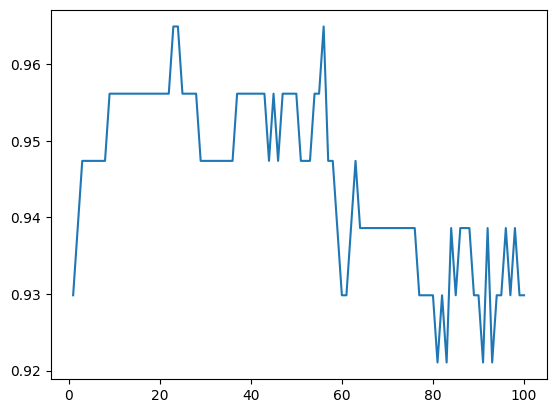

In [57]:
plt.plot(k_list, accuracy_list)
plt.show()

<span style="font-size:18px; font-weight:bold;">Task 17</span>  

Enhance the graph by adding descriptive labels and a title:  

- Use `plt.xlabel("k")` to label the x-axis.  
- Use `plt.ylabel("Validation Accuracy")` to label the y-axis.  
- Use `plt.title("Breast Cancer Classifier Accuracy")` to set the graph’s title.  

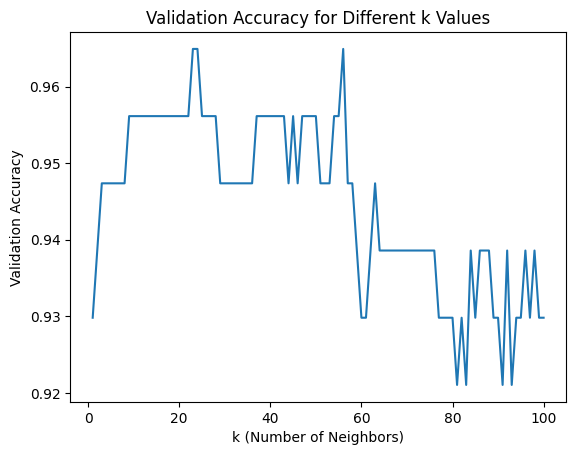

In [58]:
import matplotlib.pyplot as plt

# Plot validation accuracy vs. k values
plt.plot(k_list, accuracy_list)

# Add more details to the plot
plt.title("Validation Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Validation Accuracy")

# Display the graph
plt.show()


# Conclusions

- Logistic regression and K-Nearest Neighbors (KNN) are both useful methods for classification problems, but here we focused on KNN to predict breast cancer diagnosis.  
- Splitting the dataset into training and validation sets allowed us to train the model and test its performance on unseen data, ensuring a fair evaluation.  
- By iterating over different values of **k**, we saw how model performance changes. Small values of **k** made the classifier more sensitive to local variations, while larger values produced smoother but less flexible decision boundaries.  
- Plotting validation accuracy across values of **k** gave a clear view of the best choice for **k**, balancing accuracy and stability.  
- Overall, this project demonstrated the workflow of a machine learning classification task: importing data, preprocessing, training a model, tuning parameters, and evaluating results visually and quantitatively.  
